In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
batch_size = 128

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train = x_train.reshape(-1, 28*28)/255
x_test = x_test.reshape(-1, 28*28)/255

In [5]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [6]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [7]:
w0 = tf.Variable(tf.random_normal([784, 30]))
b0 = tf.Variable(tf.zeros([1, 30]))
w1 = tf.Variable(tf.random_normal([30, 10]))
b1 = tf.Variable(tf.zeros([1, 10]))

In [8]:
a0 = tf.sigmoid(tf.matmul(x, w0) + b0)
a1 = tf.sigmoid(tf.matmul(a0, w1) + b1)

In [9]:
loss = tf.reduce_mean(tf.square(y - a1))

In [10]:
opti = tf.train.GradientDescentOptimizer(1).minimize(loss)

In [11]:
acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y, axis=1), tf.argmax(a1, axis=1)), tf.float32))

In [12]:
def generate_date(x, y, batch_size):
    for i in range(0, len(x) - batch_size, batch_size):
        yield x[i:i+batch_size], y[i:i+batch_size]

In [13]:
se = tf.Session()

In [14]:
se.run(tf.global_variables_initializer())

In [15]:
epochs = 50
for i in range(epochs):
    for x_, y_ in generate_date(x_train, y_train, batch_size):
        se.run(opti, feed_dict={x: x_, y: y_})
    print(i, se.run([loss, acc], feed_dict={x: x_test, y: y_test}))

0 [0.090864874, 0.218]
1 [0.08408514, 0.306]
2 [0.07773326, 0.3788]
3 [0.07171275, 0.4505]
4 [0.06608826, 0.5019]
5 [0.061590936, 0.5469]
6 [0.05763843, 0.5874]
7 [0.05388947, 0.6253]
8 [0.050502285, 0.6591]
9 [0.047644235, 0.6832]
10 [0.045256782, 0.7002]
11 [0.043245133, 0.7128]
12 [0.04154315, 0.7253]
13 [0.04009003, 0.7346]
14 [0.0388331, 0.7426]
15 [0.03773399, 0.7492]
16 [0.036764562, 0.7559]
17 [0.035900805, 0.7623]
18 [0.035122965, 0.7668]
19 [0.034416508, 0.7715]
20 [0.033771083, 0.7754]
21 [0.033179346, 0.7782]
22 [0.03263589, 0.7811]
23 [0.03213601, 0.7843]
24 [0.03167508, 0.7871]
25 [0.031248735, 0.7897]
26 [0.030852936, 0.7907]
27 [0.03048402, 0.7928]
28 [0.030138927, 0.7962]
29 [0.029815035, 0.7978]
30 [0.029509893, 0.7994]
31 [0.029221563, 0.8006]
32 [0.028948203, 0.8019]
33 [0.028688168, 0.8038]
34 [0.028440097, 0.8054]
35 [0.028202532, 0.8071]
36 [0.027974136, 0.8088]
37 [0.027753247, 0.8094]
38 [0.02753787, 0.8105]
39 [0.027325263, 0.8118]
40 [0.027111271, 0.8129]
41 

In [16]:
res = np.argmax(se.run(a1, feed_dict={x: x_test[:20], y: y_test[:20]}), axis=1)

In [17]:
res.reshape([4, 5])

array([[7, 2, 1, 0, 4],
       [1, 4, 9, 6, 9],
       [0, 8, 9, 0, 1],
       [5, 9, 7, 2, 4]])

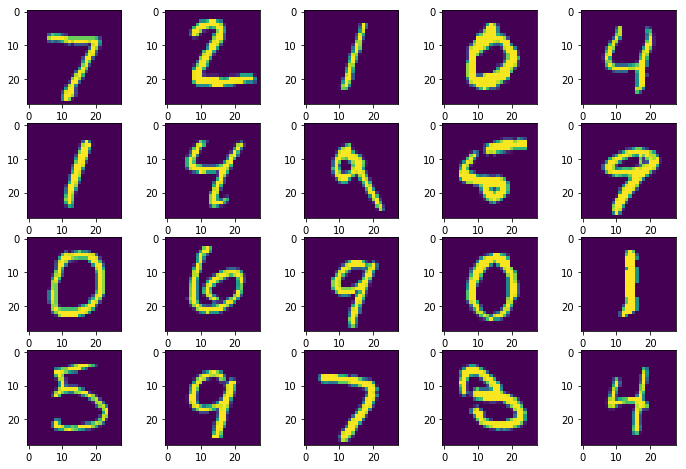

In [18]:
fig = plt.figure(figsize=(12, 8))
for i in range(20):
    fig.add_subplot(4, 5, i+1)
    plt.imshow(x_test[i].reshape([28, 28]))

In [19]:
se.close()